## This Notebook contains all work associated with Tasks 1 and Task 2

In [87]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

In [2]:
## Read the Key, logerror, transaction date set
df_parcel = pd.read_csv("c:/Users/ibipul/Documents/Python Scripts/datasets/zillow_data/train_2016_v2.csv")

In [5]:
## Read the attribute set
df_properties = pd.read_csv("c:/Users/ibipul/Documents/Python Scripts/datasets/zillow_data/properties_2016.csv",low_memory=False)

In [26]:
## Finding Variables of interest. 
# Intuitively The relevant variables will definitely be recorded if a parameter is deemed important towards sales.
# Total data points is: 2985217, We find columns where non-null values are atleast 2900k
candidate_variable_list = []
non_null_val_list = []
for i in list(df_properties.columns.values):
    non_null_val_count = sum(df_properties[i].notnull()*1)
    
    if non_null_val_count > 2900000:
        print(i, ', Value Not Null count is: ', non_null_val_count)
        candidate_variable_list.append(i)
        non_null_val_list.append(non_null_val_count)
## Additionally rejecting some more string type variables for now
candidate_variable_list.remove('propertycountylandusecode') #These are string type objects
candidate_variable_list.remove('censustractandblock')
candidate_variable_list.remove('rawcensustractandblock')  

parcelid , Value Not Null count is:  2985217
bathroomcnt , Value Not Null count is:  2973755
bedroomcnt , Value Not Null count is:  2973767
calculatedfinishedsquarefeet , Value Not Null count is:  2929652
fips , Value Not Null count is:  2973780
latitude , Value Not Null count is:  2973780
longitude , Value Not Null count is:  2973780
propertycountylandusecode , Value Not Null count is:  2972940
propertylandusetypeid , Value Not Null count is:  2973780
rawcensustractandblock , Value Not Null count is:  2973780
regionidcity , Value Not Null count is:  2922372
regionidcounty , Value Not Null count is:  2973780
regionidzip , Value Not Null count is:  2971237
roomcnt , Value Not Null count is:  2973742
yearbuilt , Value Not Null count is:  2925289
structuretaxvaluedollarcnt , Value Not Null count is:  2930235
taxvaluedollarcnt , Value Not Null count is:  2942667
assessmentyear , Value Not Null count is:  2973778
landtaxvaluedollarcnt , Value Not Null count is:  2917484
taxamount , Value No

In [30]:
## We are left with 18 columns, we have dropped 17 columns
df = df_properties[candidate_variable_list]

In [31]:
df.shape

(2985217, 18)

In [33]:
# Merging df_parcel, with df
dfmain = pd.merge(df_parcel,df,on='parcelid')

In [83]:
## This is the merged data variable that contains both errorlog, transactionid, as well as
dfmain.head(10)

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,11016594,0.0276,2016-01-01,2.0,3.0,1684.0,6037.0,34280990.0,-118488536.0,261.0,12447.0,3101.0,96370.0,0.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88
1,14366692,-0.1684,2016-01-01,3.5,4.0,2263.0,6059.0,33668120.0,-117677556.0,261.0,32380.0,1286.0,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02
2,12098116,-0.0040,2016-01-01,3.0,2.0,2217.0,6037.0,34136312.0,-118175032.0,261.0,47019.0,3101.0,96293.0,0.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48
3,12643413,0.0218,2016-01-02,2.0,2.0,839.0,6037.0,33755800.0,-118309000.0,266.0,12447.0,3101.0,96222.0,0.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74
4,14432541,-0.0050,2016-01-02,2.5,4.0,2283.0,6059.0,33485643.0,-117700234.0,261.0,17686.0,1286.0,96961.0,8.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96
5,11509835,-0.2705,2016-01-02,4.0,4.0,3067.0,6037.0,33870089.0,-118402768.0,261.0,29712.0,3101.0,96109.0,0.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57
6,12286022,0.0440,2016-01-02,1.0,2.0,1297.0,6037.0,33899475.0,-118212720.0,261.0,24174.0,3101.0,96091.0,0.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97
7,17177301,0.1638,2016-01-02,2.5,3.0,1763.0,6111.0,34207204.0,-119165589.0,266.0,13150.0,2061.0,97101.0,6.0,1994.0,107000.0,306000.0,2015.0,199000.0,3745.50
8,14739064,-0.0030,2016-01-02,1.0,2.0,796.0,6059.0,33549600.0,-117678000.0,266.0,25459.0,1286.0,96987.0,0.0,1984.0,66834.0,210064.0,2015.0,143230.0,2172.88
9,14677559,0.0843,2016-01-03,2.0,2.0,1260.0,6059.0,33612700.0,-117742000.0,266.0,46098.0,1286.0,96963.0,5.0,1977.0,109977.0,190960.0,2015.0,80983.0,1940.26


In [101]:
############
## TASK 1 ##
############
interesting_variables = ['bathroomcnt','bedroomcnt','roomcnt', 'calculatedfinishedsquarefeet','yearbuilt',
                         'structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']
df_corr = df[interesting_variables].corr()
df_corr

,bathroomcnt,bedroomcnt,roomcnt,calculatedfinishedsquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
bathroomcnt,1.000000,0.701141,0.062613,0.351715,0.328097,0.273515,0.326395,0.281953,0.312825
bedroomcnt,0.701141,1.000000,0.162882,0.261357,0.046866,0.127920,0.147426,0.115045,0.147094
roomcnt,0.062613,0.162882,1.000000,0.036318,0.126897,-0.016016,0.002720,0.015639,-0.021474
calculatedfinishedsquarefeet,0.351715,0.261357,0.036318,1.000000,0.115244,0.629473,0.535773,0.323191,0.538527
yearbuilt,0.328097,0.046866,0.126897,0.115244,1.000000,0.184827,0.137470,0.064249,0.122270
structuretaxvaluedollarcnt,0.273515,0.127920,-0.016016,0.629473,0.184827,1.000000,0.846456,0.480061,0.807082
taxvaluedollarcnt,0.326395,0.147426,0.002720,0.535773,0.137470,0.846456,1.000000,0.873672,0.949731
landtaxvaluedollarcnt,0.281953,0.115045,0.015639,0.323191,0.064249,0.480061,0.873672,1.000000,0.821424
taxamount,0.312825,0.147094,-0.021474,0.538527,0.122270,0.807082,0.949731,0.821424,1.000000


## Task 1: Heat map Visualization

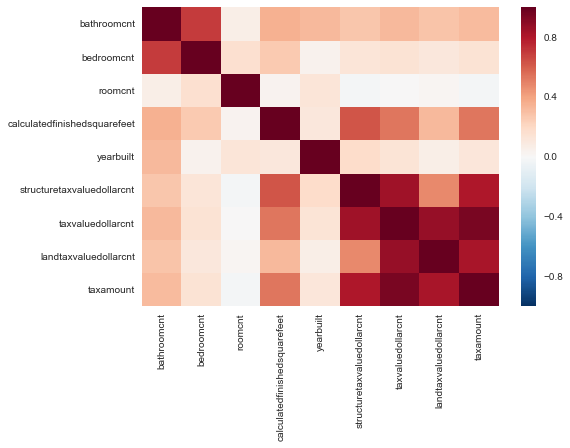

In [102]:
sns.heatmap(df_corr, xticklabels=df_corr.columns.values,yticklabels=df_corr.columns.values)

### Pearson correlation Heatmap (Task 1)

  - This is a heatmap view of the correlation matrix of some of the interesting variables
  - Most positive correlation is found between bedroom count and bathroom count in this list (0.70) and most negative is between taxamount and room count (-0.022)


In [107]:
df2 = df.dropna(axis=0,how='any')
df2.shape

(2838232, 18)

In [142]:
##########
## TASK 2a
#########
scatter_variable_set = ['roomcnt','bathroomcnt','bedroomcnt','garagecarcnt','numberofstories']
df3 = df_properties[scatter_variable_set].dropna(axis=0,how='any')
df3.shape

(646933, 5)

## Following are the Task 2 Activities

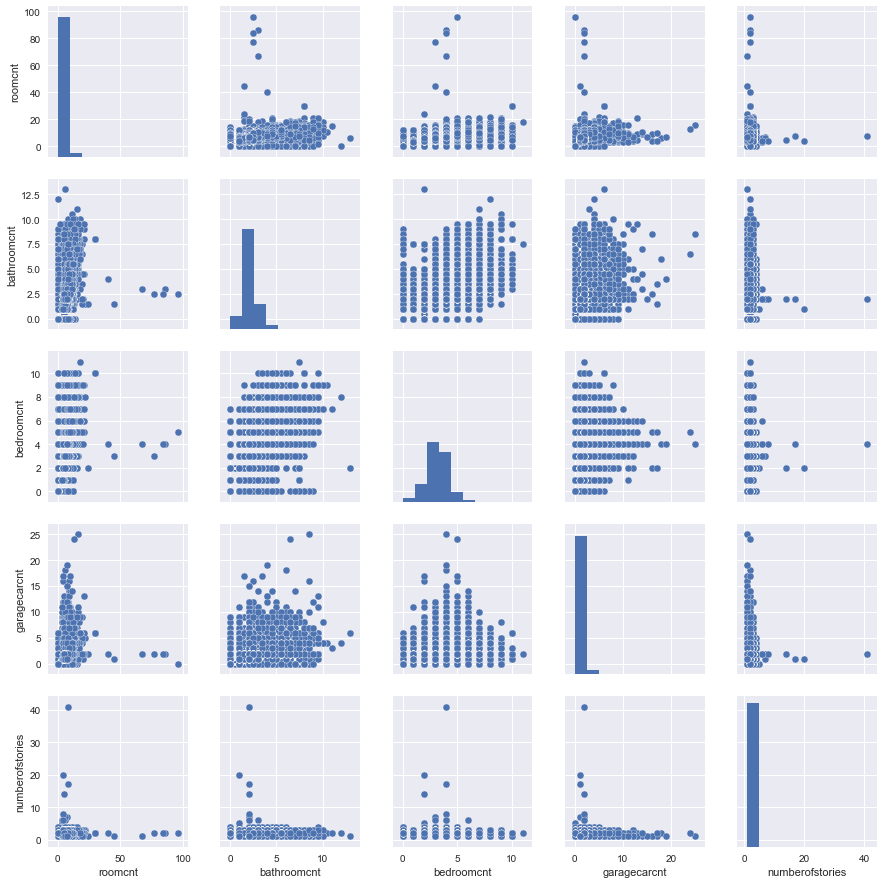

In [141]:
sns.pairplot(df3)

### ScatterPlot For some of the count data (part a)
Here is a pallate of pairwise plots of various count data in the given dataset. While a lot of these data are missing for all properties but for about 680k+ properties all of them were available. 

    - First of all, these were all discrete count data attributes in the data set, it seemed like a good idea to bunch them together and explore relationships among them.
    - Data dictionary had the quantity called 'numberofstories' the house has. Interestingly there are some in these data where there are 20+ stories in the house but room count is very less. It could be these are whole buildings of luxurious apartment suites, or, large commercial working space. Interestingly however there are still some bedrooms listed in some of these case.
    - It is interesting to observe that largest concentration listings carspace in garage is less than 5. So largest market share is non commercial listings.
    - Mostly the bedroom to bathroom ratio is 2:1, I am however not sure about listings where there are 10 bedrooms and 5 bathrooms they seem to be shared living spaces.
    - It is also interesting to see that there are spaces where garage car space is 20+ but number of stories is definitely less than 5. Even rooms or bedrooms are less than 10. These could be outliers or probably office spaces.

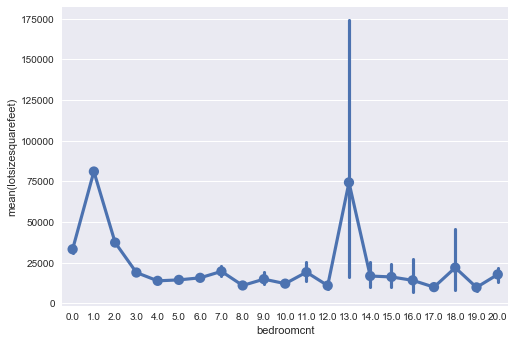

In [192]:
sns.pointplot(x='bedroomcnt',y='lotsizesquarefeet',data=df_properties.sample(frac=0.40, replace=False))

### Line Plot for bedroom count vs lot size in square feet (part b)
This plot show the average lot size for the listings as well as the variance from the average for a given number of bedroom counts in the property. 
    - The 0 bedroom count is usually attributed to studio type apartments where bedroom information usually doesn't exist.
    - It is interesting to see available lotsize in 1 bedroom listings is quite high as compared to higher bedroom sizes-- usually a decreasing trend. 
    - Interestingly however there is a wide variance in available lot size in 13 bedroom listings. 
    This is probably because some of these might be expensive or luxurious homes with large open areas in the higher lot size cases, and could be commercial residential places on the lower side.

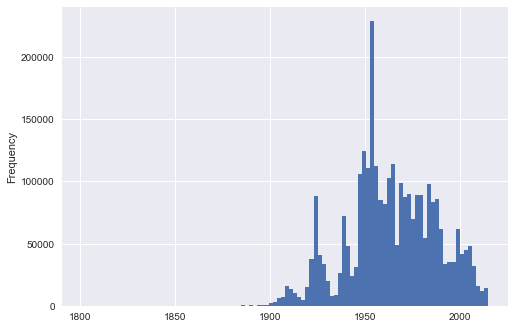

In [177]:
df_properties['yearbuilt'].plot.hist(bins=100)

### Histogram of years when the property was built (part c)
    - Largest number of buildings listed are from 1960s, these seem to be the urban housings. 
    That includes independent houses as well as well as residential apartments. 
    - There is also a marked peak in and around 1920-30s that roughly coincides with the end of prohibition that saw a boost in the economy. 
    - There are also properties that are listed as built in 19th century but those are very few.
    - Data also shows that there has been a steady number of housing facilities being created for few decades post 1960s

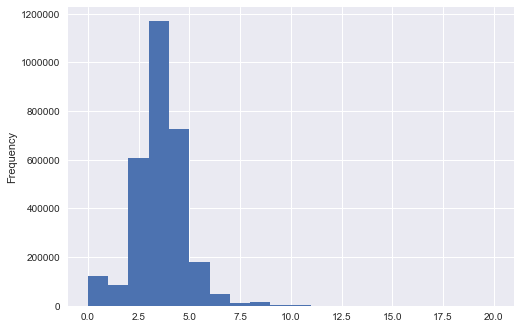

In [196]:
df_properties['bedroomcnt'].plot.hist(bins=20)

### Histogram of number of bedrooms in the listings (part d)
It is a good idea to see how the number bedrooms are distributed over the listings. 
    - Largest number of listings have 3-4 bedrooms, 
    - followed by a bulk in the 2 bedrooms, 
    - There is a spike near zero, which is probably because of a large number of studio apartment listings. 

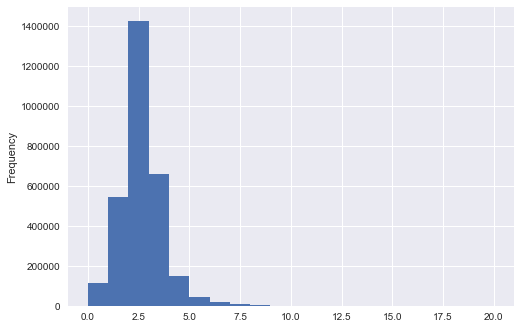

In [201]:
df_properties['bathroomcnt'].plot.hist(bins=20)

### Distributions of number of bathrooms in the listings (part e)
This histograms present that the largest number of listings have 2-2.5 bath arrangements, this is consistent with most residental listings. Even in a 3-4 bedroom house the number of bathrooms are usually half of number of bedrooms.